In [5]:
%config Completer.use_jedi = False

In [6]:
from molmap import GlobAASeqMolMap

In [7]:
ps0 = 'MLMPKKNRIAIHELLFKEGVMVAKKDVHMPKHPELAD'
ps1 = 'MQSLKSMLMPKKNRIAIHELLFKNVPNLHVMKA'
ps2 = 'KEGVMVAKKDVHMPKHPELADKNVPNLHVMKAMQSLK'
ps3 = 'MQSLKSMLMPKKNRIAIHVPNLHVMKANLHVMK'
ps4 = 'KEKKDVHMPKHPELADKNVPNLHVMKAMQSLK'
ps5 = 'MPKHPELADKNMQSLKSMLMAKKDVHVIANLHV'
seq_list = [ps0, ps1, ps2, ps3, ps4, ps5]

In [8]:
smp = GlobAASeqMolMap(seq_list, metric='cosine')

2021-07-21 15:59:19,384 - INFO - [bidd-molmap] - Total Sequences to calculate: 6, feature parameters: {'AAC12': {}, 'Autocorr': {}, 'CTD': {}, 'QSO': {'maxlag': 30, 'weight': 0.1}, 'PAAC': {'lamda': 30, 'weight': 0.05}}
2021-07-21 15:59:19,387 - INFO - [bidd-molmap] - Total features to calculate: 1947, details: {'AAC12': 820, 'Autocorr': 720, 'CTD': 147, 'PAAC': 100, 'QSO': 160}


100%|##########| 6/6 [00:00<00:00, 163.09it/s]


2021-07-21 15:59:23,274 - INFO - [bidd-molmap] - Calculating distance ...
2021-07-21 15:59:23,473 - INFO - [bidd-molmap] - the number of process is 16


100%|##########| 1947/1947 [00:01<00:00, 1265.22it/s]


In [9]:
smp.fit(cluster_channels = 0, var_thr=1e-2)

UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Wed Jul 21 16:00:57 2021 Finding Nearest Neighbors
Wed Jul 21 16:00:57 2021 Finished Nearest Neighbor Search
Wed Jul 21 16:00:58 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Jul 21 16:01:01 2021 Finished embedding
2021-07-21 16:01:01,305 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-07-21 16:01:02,146 - INFO - [bidd-molmap] - Finished


In [5]:
smp.batch_transform(seq_list).shape

100%|##########| 6/6 [00:00<00:00, 885.68it/s]


(6, 31, 30, 5)

In [6]:
smp.plot_scatter(radius = 5)

2021-07-16 14:29:13,552 - INFO - [bidd-molmap] - generate file: ./feature points_907_cosine_umap_scatter
2021-07-16 14:29:13,580 - INFO - [bidd-molmap] - save html file to ./feature points_907_cosine_umap_scatter


In [7]:
smp.plot_grid()

2021-07-16 14:29:13,647 - INFO - [bidd-molmap] - generate file: ./feature points_907_cosine_umap_mp
2021-07-16 14:29:13,676 - INFO - [bidd-molmap] - save html file to ./feature points_907_cosine_umap_mp


In [8]:
X = smp.batch_transform(seq_list, scale_method = 'standard')

100%|##########| 6/6 [00:00<00:00, 465.69it/s]


In [9]:
from molmap import show

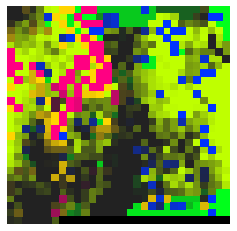

In [10]:
show.imshow_wrap(X[0], x_max=1, color_list=smp.colormaps.values())

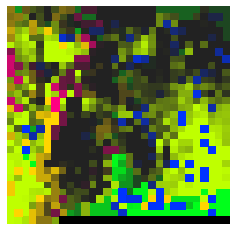

In [11]:
show.imshow_wrap(X[1], x_max=1, color_list=smp.colormaps.values())

In [12]:
import matplotlib.pyplot as plt

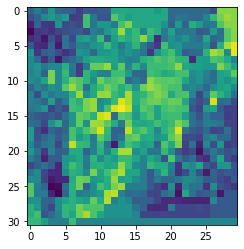

In [13]:
plt.imshow(X[2].sum(axis=-1))